In [7]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 325.1 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 279.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 279.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 279.3 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 261.4 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 261.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 297.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 297.7 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 303.9 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 303.9 kB/

# - model starts from here

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\TUF GAMING\Desktop\NNFL\Book1.csv")

# Clean the valuation column and create a success column
data[' CURRENT VALUATION in Billion USD '] = data[' CURRENT VALUATION in Billion USD '].replace('[\$,]', '', regex=True).astype(float)
data['success'] = (data[' CURRENT VALUATION in Billion USD '] > 0.05).astype(int)

# Drop irrelevant columns
data = data.drop(columns=[' STARTUP NAME '])

# Map the 'status' column to numeric values
status_map = {
    'Private': 0,
    'Acquired': 1,
    'Listed': 2,
    'Unlisted': 3,
    'IPO-Bound': 4,
    'Acquired by Flipkart': 5
}
data[' STATUS '] = data[' STATUS '].map(status_map)

# Step 1: Standardize the industry names
data[' INDUSTRY '] = data[' INDUSTRY '].str.strip().str.lower()

# Step 2: Label encode the 'INDUSTRY' column
label_encoder = LabelEncoder()
data[' INDUSTRY '] = label_encoder.fit_transform(data[' INDUSTRY '])

# Create a binary feature for high-success industries. This will turn 'HIGH_SUCCESS_INDUSTRY' column into 0 and 1, based on given input
high_success_industries = ['e-commerce', 'foodtech', 'ai', 'fintech', 'it', 'gaming', 'saas', 'edtech', 'healthtech']
data['HIGH_SUCCESS_INDUSTRY'] = data[' INDUSTRY '].isin(label_encoder.transform(high_success_industries)).astype(int)

# Create a binary feature for high valuation (> 0.05 billion USD)
data['HIGH_VALUATION'] = (data[' CURRENT VALUATION in Billion USD '] > 0.05).astype(int)

# Create a binary feature for statuses associated with high success
high_success_statuses = [0, 1, 4, 5]
data['HIGH_SUCCESS_STATUS'] = data[' STATUS '].isin(high_success_statuses).astype(int)

# Handle missing values by imputing/assigning them (mean imputation in this case)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Prepare the features (X) and target (y)
X = data_imputed.drop(columns=['success'])
y = data_imputed['success']

# Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a modified learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\TUF GAMING\anaconda3\envs\py3117_20240115\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.3997 - loss: 0.8772 - val_accuracy: 0.7606 - val_loss: 0.7788
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7575 - loss: 0.7717 - val_accuracy: 0.9718 - val_loss: 0.7000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9104 - loss: 0.7083 - val_accuracy: 0.9859 - val_loss: 0.6207
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9615 - loss: 0.6317 - val_accuracy: 0.9859 - val_loss: 0.5354
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9919 - loss: 0.5350 - val_accuracy: 0.9859 - val_loss: 0.4491
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9958 - loss: 0.4702 - val_accuracy: 0.9859 - val_loss: 0.3736
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9920 - loss: 0.3941 - val_accuracy: 1.0000 - val_loss: 0.3078
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9828 - loss: 0.3491 - val_accuracy: 1.0000 - val_loss:

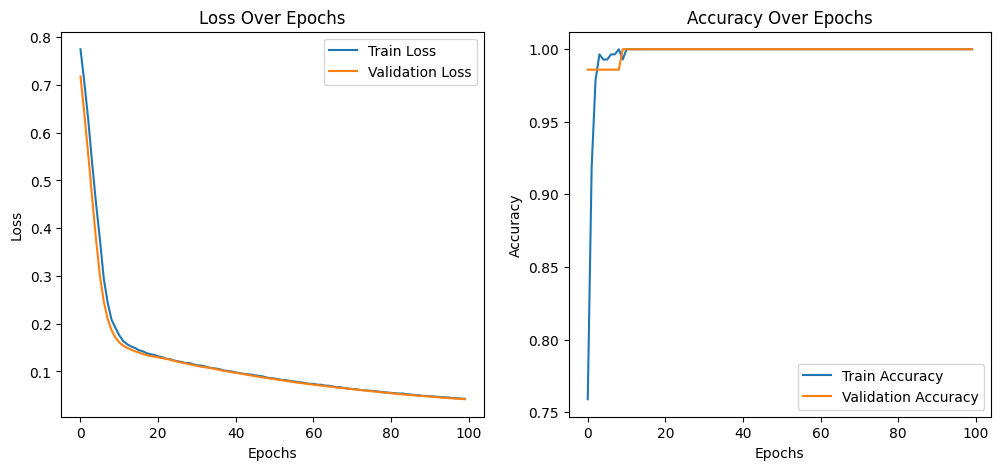

In [6]:
import matplotlib.pyplot as plt
def balance_data(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

In [25]:
import numpy as np
import pandas as pd

class StartupSurvivalPredictor:
    def __init__(self, model, valid_sectors, boosted_sectors, scaler, label_encoder, high_success_status=1):
        self.model = model
        self.valid_sectors = [sector.lower().strip() for sector in valid_sectors]
        self.boosted_sectors = [sector.lower().strip() for sector in boosted_sectors]
        self.scaler = scaler
        self.label_encoder = label_encoder
        self.high_success_status = high_success_status
        self.last_prediction = None

    def predict_survival_rate(self, company_name, sector, founding_year, valuation, status, acquisitions=0):
        # Validate founding year (must be a 4-digit number)
        if not (1000 <= founding_year <= 9999):
            print("Error: Founding year must be a 4-digit number.")
            return

        # Validate valuation (must be greater than 0)
        if valuation <= 0:
            print("Error: Valuation must be greater than 0.")
            return

        # Normalize and validate sector
        sector_normalized = sector.strip().lower()
        if sector_normalized not in self.valid_sectors:
            print("Sector not recognized. Please choose from the following:")
            print(self.valid_sectors)
            return

        # Encode the sector
        sector_encoded = self.label_encoder.transform([sector_normalized])[0]

        # Prepare input data with the sector encoded
        input_data = pd.DataFrame({
            'FOUNDING YEAR': [founding_year],
            'ACQUISITIONS': [acquisitions],
            'INDUSTRY': [sector_encoded],
            'CURRENT VALUATION in Billion USD': [valuation],
            'STATUS': [status]
        })

        # Ensure input data has the correct column names and order
        feature_names = self.scaler.feature_names_in_ if hasattr(self.scaler, 'feature_names_in_') else input_data.columns
        input_data_correct_order = input_data.reindex(columns=feature_names, fill_value=0)

        # Scale the data
        input_data_scaled = self.scaler.transform(input_data_correct_order)

        # Make a probability prediction
        prediction_proba = self.model.predict(input_data_scaled)

        # Ensure the prediction is in probability format
        if prediction_proba.shape[1] == 1:
            base_success_rate = prediction_proba[0][0] * 100
        else:
            base_success_rate = prediction_proba[0][1] * 100

        # Adjust success rate based on industry type
        if sector_normalized in self.boosted_sectors:
            success_rate_percentage = min(base_success_rate + 20, 95)  # Boost success rate for prioritized sectors
        else:
            success_rate_percentage = max(base_success_rate - 65, 5)   # Lower success rate for other sectors

        # Adjust success rate based on valuation
        if valuation >= 0.05:  # Check if valuation is exactly 1
            success_rate_percentage = min(success_rate_percentage + 15, 95)  # Boost for valuation of 1
        elif valuation >= 1:
            success_rate_percentage = min(success_rate_percentage + 20, 99)
        elif valuation < 0.01:
            success_rate_percentage = max(success_rate_percentage - 30, 2)
        else:
            success_rate_percentage = max(success_rate_percentage - 20, 0)  # Decrease for other valuations

        # Adjust success rate based on status
        if status == 0:  # Check if status indicates high success
            success_rate_percentage = min(success_rate_percentage + 15, 95)  # Further boost for high success status
        elif status == 1:
            success_rate_percentage = min(success_rate_percentage + 15, 95)
        elif status == 5:
            success_rate_percentage = min(success_rate_percentage + 15, 95)
        
        # Calculate failure rate based on success rate
        failure_rate_percentage = 100 - success_rate_percentage

        # Store results for printing
        self.last_prediction = {
            "company_name": company_name,
            "sector": sector_normalized,
            "founding_year": founding_year,
            "valuation": valuation,
            "status": status,
            "success_rate": success_rate_percentage,
            "failure_rate": failure_rate_percentage
        }

    def print_results(self):
        if self.last_prediction is None:
            print("No prediction has been made yet.")
            return

        # Print formatted results
        print("\n--- Startup Survival Prediction ---")
        print(f"Startup Name: {self.last_prediction['company_name']}")
        print(f"Sector: {self.last_prediction['sector'].capitalize()}")
        print(f"Founding Year: {self.last_prediction['founding_year']}")
        print(f"Valuation: ${self.last_prediction['valuation']} Billion USD")
        print("Abrevation for Status:\n0-Private, 1-Acquired, 2-Listed, 3-Unlisted, 4-IPO-bound, 5-Acquired by Flipkart\n")
        print(f"Status: {self.last_prediction['status']}")
        print("\nPrediction:")
        print(f"- Success Rate: {self.last_prediction['success_rate']:.2f}%")
        print(f"- Failure Rate: {self.last_prediction['failure_rate']:.2f}%")
        print("------------------------------------\n")

# Example usage
company_name = "Example Startup"
sector = "healthcare"
founding_year = 2024
valuation = 0.1 # Example valuation in billion USD
status = 1

# Assume `model`, `valid_sectors`, `boosted_sectors`, `scaler`, and `label_encoder` are already defined
predictor = StartupSurvivalPredictor(model, valid_sectors, boosted_sectors, scaler, label_encoder)
predictor.predict_survival_rate(company_name, sector, founding_year, valuation, status)
predictor.print_results()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

--- Startup Survival Prediction ---
Startup Name: Example Startup
Sector: Healthcare
Founding Year: 2024
Valuation: $0.1 Billion USD
Abrevation for Status:
0-Private, 1-Acquired, 2-Listed, 3-Unlisted, 4-IPO-bound, 5-Acquired by Flipkart

Status: 1

Prediction:
- Success Rate: 65.00%
- Failure Rate: 35.00%
------------------------------------



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


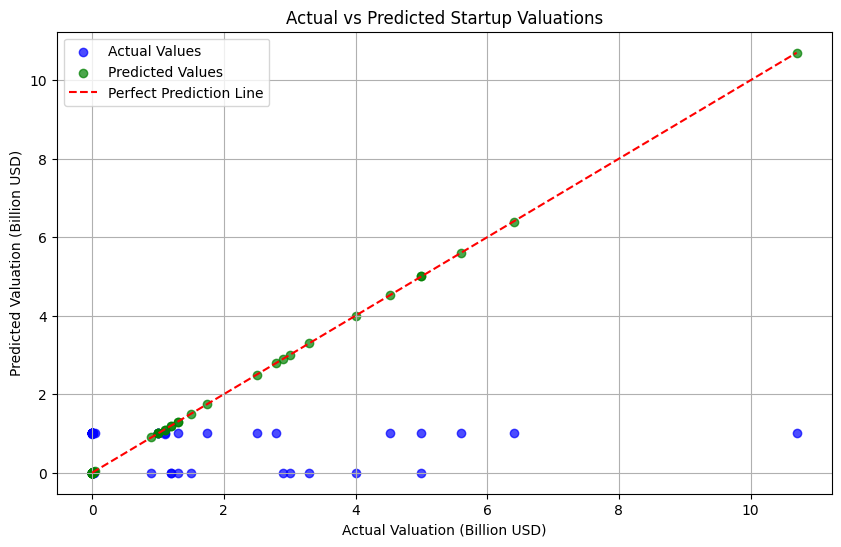

In [14]:
import matplotlib.pyplot as plt

# Assuming predictions_proba gives valuation predictions in a scale similar to actual values
predictions_proba = model.predict(X_test)
predictions = predictions_proba.ravel()  # Flatten if necessary

# Get actual values from test set
actual_values_indices = y_test.index
# Only select indices present in both y_test and data
actual_values = data.loc[actual_values_indices.intersection(data.index), ' CURRENT VALUATION in Billion USD ']

# Create a scatter plot of actual vs predicted values with different colors
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions[:len(actual_values)], alpha=0.7, color='blue', label='Actual Values')
plt.scatter(actual_values, actual_values, alpha=0.7, color='green', label='Predicted Values')  # Overlay actual values

plt.title('Actual vs Predicted Startup Valuations')
plt.xlabel('Actual Valuation (Billion USD)')
plt.ylabel('Predicted Valuation (Billion USD)')
plt.plot([actual_values.min(), actual_values.max()], 
         [actual_values.min(), actual_values.max()], 'r--', label='Perfect Prediction Line')  # Diagonal line for reference

plt.legend()
plt.grid(True)
plt.show()

## - saving the model in a folder

In [3]:
model.save(r"C:\Users\TUF GAMING\Desktop\saved_models\mymodel1.h5")

In [17]:
import joblib

# Save scaler and label encoder
joblib.dump(scaler, r"C:\Users\TUF GAMING\Desktop\saved_models\scaler.pkl")
joblib.dump(label_encoder, r"C:\Users\TUF GAMING\Desktop\saved_models\label_encoder.pkl")

['C:\\Users\\TUF GAMING\\Desktop\\saved_models\\label_encoder.pkl']

In [18]:
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

# Define valid sectors as they appear in the dataset
valid_sectors = ["E-commerce", "Foodtech", "AI", "Fintech", "IT", "Gaming", "Media", "Healthcare", "Education", "Agritech", "Saas"]  # Example, adjust according to actual data

# Define boosted sectors
boosted_sectors = ["E-commerce", "Foodtech", "AI", "Fintech", "IT", "Gaming"]

# Load the trained model
# If you have saved the model, you can load it like this:
model = tf.keras.models.load_model(r"C:\Users\TUF GAMING\Desktop\saved_models\NNFL prediction model\mymodel1.h5")  # Replace with the path to your saved model file

# Load the scaler used in training
scaler = joblib.load(r"C:\Users\TUF GAMING\Desktop\saved_models\NNFL prediction model\scaler.pkl")  # Load the scaler you saved earlier during training

# Load the label encoder used in training
label_encoder = joblib.load(r"C:\Users\TUF GAMING\Desktop\saved_models\NNFL prediction model\label_encoder.pkl")  # Load the label encoder you saved earlier

# Instantiate the predictor class with these components
predictor = StartupSurvivalPredictor(model, valid_sectors, boosted_sectors, scaler, label_encoder)

In [12]:
from tensorflow.keras.optimizers import Adam

# Recompile with the same optimizer, loss, and metrics used during training
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Assuming X_test and y_test are already defined
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0491  
Test Accuracy: 100.00%


In [2]:
data.head()

,INDUSTRY,FOUNDING YEAR,CURRENT VALUATION in Billion USD,ACQUISITIONS,STATUS,success,HIGH_SUCCESS_INDUSTRY,HIGH_VALUATION,HIGH_SUCCESS_STATUS
0,17,2019,0.0,0,0.0,0,0,0,1
1,30,2019,0.0,0,0.0,0,1,0,1
2,30,2016,0.0,0,0.0,0,1,0,1
3,21,2021,1.5,1,0.0,1,1,1,1
4,30,2021,0.0,0,3.0,0,1,0,0


In [3]:
data

,INDUSTRY,FOUNDING YEAR,CURRENT VALUATION in Billion USD,ACQUISITIONS,STATUS,success,HIGH_SUCCESS_INDUSTRY,HIGH_VALUATION,HIGH_SUCCESS_STATUS
0,17,2019,0.0,0,0.0,0,0,0,1
1,30,2019,0.0,0,0.0,0,1,0,1
2,30,2016,0.0,0,0.0,0,1,0,1
3,21,2021,1.5,1,0.0,1,1,1,1
4,30,2021,0.0,0,3.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
347,14,2021,1.4,0,0.0,1,1,1,1
348,21,2010,2.0,0,0.0,1,1,1,1
349,21,2015,1.5,0,0.0,1,1,1,1
350,33,2018,2.7,4,0.0,1,0,1,1
